In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.array([41, 143, 182, 83, 131]).reshape(-1,1)
Y = np.array([0, 1, 1, 0, 1]).reshape(-1,1)
X_test = np.array([146]).reshape(-1,1)

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X, Y)
print(lr_model.score(X,Y))
print(lr_model.predict(X_test))
#1.2
print(lr_model.intercept_,lr_model.coef_)
# model.intercept_


1.0
[1]
[-24.0671197] [[0.2252311]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import math
x = np.array([146]).reshape(-1,1)
y = 1/(1 + math.exp(-(-24.0671197+ (0.2252311* x))))
print(y)

0.9998517735131627


<ipython-input-60-d1797b135463>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = 1/(1 + math.exp(-(-24.0671197+ (0.2252311* x))))


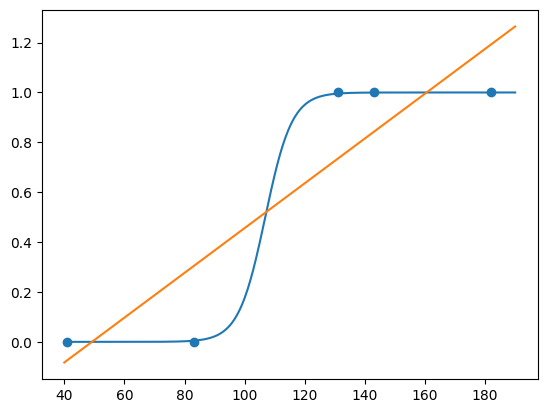

In [ ]:
X_line = np.linspace(40, 190, 500).reshape(-1,1)
Y_pre = lr_model.predict(X_line)
Y_lr = lr_model.predict_proba(X_line)[:,1]
plt.scatter(X,Y)
plt.plot(X_line, Y_lr)

from sklearn.linear_model import LinearRegression
ln_model = LinearRegression()
ln_model.fit(X,Y)
Y_pred = ln_model.predict(X_line)
plt.plot(X_line, Y_pred)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: 

best Acc 0.61875
Best Cv 5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.91      0.84      0.88       215
           1       0.72      0.84      0.78       105

    accuracy                           0.84       320
   macro avg       0.82      0.84      0.83       320
weighted avg       0.85      0.84      0.84       320

84.0625


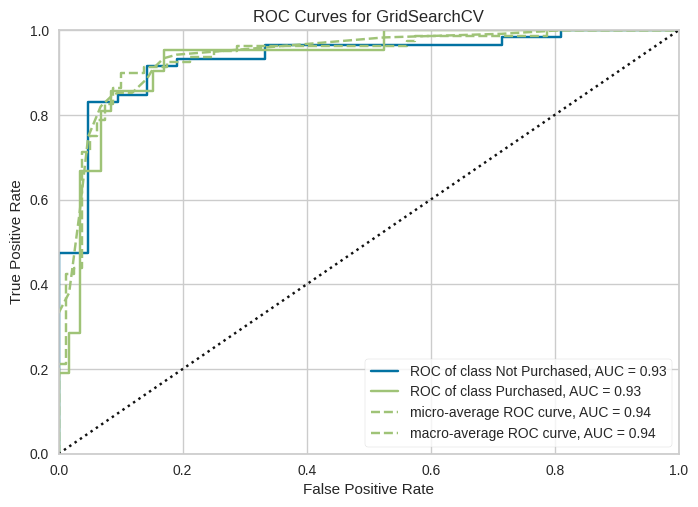

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('Social_Network_Ads.csv')
#print(data.info())

dummy = pd.get_dummies(data['Gender'])
data = pd.concat([data, dummy], axis = 'columns')
data.drop('Gender', axis=1, inplace=True)
#print(data.head())
Y = data['Purchased']
X = data.drop(['User ID', 'Purchased'], axis= 1).values

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_normalized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

lr_model = LogisticRegression()
lr_model.fit(X, Y)
#print(lr_model.score(X,Y) *100)
y_pred = lr_model.predict(X_train)
y_pred_prob = lr_model.predict_proba(X)

acc = []
for i in range(5, 10):
  range_k = range(1,10)
  lr_model = LogisticRegression()
  lr_params = {'max_iter': range_k ,'solver': ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],  'penalty': ['l1','l2','elasticnet', None], 'multi_class':['auto','ovr','multinomial']}
  grid_model = GridSearchCV(lr_model, lr_params, cv= i, scoring='accuracy')
  grid_model.fit(X_train, y_train)

  accuracy = accuracy_score(y_train, y_pred)
  acc.append(accuracy)

print("best Acc", max(acc*100))
print("Best Cv", acc.index(max(acc))+5)

best_cv = acc.index(max(acc))+5
grid_model = GridSearchCV(lr_model, lr_params, cv= best_cv, scoring='accuracy')
grid_model.fit(X_train, y_train)

y_pred = grid_model.predict(X_train)
y_prob = grid_model.predict_proba(X)[:, 1]
# auc = roc_auc_score(y_test, y_prob)
# print('AUC: ', auc)

print(metrics.classification_report(y_pred, y_train))
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred)
print(accuracy*100)
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(grid_model, classes=["Not Purchased", "Purchased"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# Load data
iris = datasets.load_iris()
X = iris.data
Y= iris.target
from sklearn.model_selection import train_test_split
# scaler = StandardScaler()
# X_normalized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

lr_model = LogisticRegression()
lr_model.fit(X, Y)
#print(lr_model.score(X,Y) *100)
y_pred = lr_model.predict(X_train)
y_pred_prob = lr_model.predict_proba(X)

lr_params = {'max_iter': range(10, 100, 10) ,'solver': ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],  'penalty': ['l1','l2','elasticnet', None], 'multi_class':['auto','ovr','multinomial']}
acc = []
for i in range(5,21,5):
  grid_model = GridSearchCV(lr_model, lr_params, cv= i, scoring='accuracy')
  grid_model.fit(X_train, y_train)
  accuracy = accuracy_score(y_train, y_pred)
  acc.append(f'number_CV : {i} \n CV accuracy : {grid_model.best_score_*100} % \n Best Parameters: {grid_model.best_params_}')

Streaming output truncated to the last 5000 lines.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_mo

In [6]:
for j in acc:
  print(j, "\n")

number_CV : 5 
 CV accuracy : 99.16666666666669 % 
 Best Parameters: {'max_iter': 80, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'} 

number_CV : 10 
 CV accuracy : 98.33333333333331 % 
 Best Parameters: {'max_iter': 10, 'multi_class': 'auto', 'penalty': None, 'solver': 'newton-cg'} 

number_CV : 15 
 CV accuracy : 98.33333333333333 % 
 Best Parameters: {'max_iter': 10, 'multi_class': 'auto', 'penalty': None, 'solver': 'newton-cg'} 

number_CV : 20 
 CV accuracy : 98.33333333333334 % 
 Best Parameters: {'max_iter': 10, 'multi_class': 'auto', 'penalty': None, 'solver': 'newton-cg'} 



In [3]:
lr_model = LogisticRegression(max_iter=50, multi_class='auto', penalty=None, solver='newton-cholesky')
lr_model.fit(X_train, y_train)

new_features = np.array([6.1, 2.6, 4.2, 1.7])
prediction = lr_model.predict(new_features.reshape(1, -1))
probabilities = lr_model.predict_proba(new_features.reshape(1, -1))

print(prediction)
print(probabilities)

[1]
[[4.75399462e-07 9.99998843e-01 6.81810922e-07]]
